# Tutorial 3

## Q1. Essential Convolution

### (a)
$$
    u[n]=x[n]*y[n]=[16,4,-22,40,-5,-27,9,-6,-1,3,-1,2,0],\ n\in[-8,4]
$$

$$
    v[n]=x[n]*w[n]=[6,12,-5,18,40,-9,29,19,23,0,9,2,0],\ n\in[-5,7]
$$
$$
    g[n]=w[n]*x[n]=[24,54,-17,-29,43,45,-22,-53,-23,6,12,7,1],\ n\in[-7,5]
$$

Use Python to verify the result:


u[n]= [ 16   4 -22  40  -5 -27   9  -6  -1   3  -1   2   0]
t_1 [n]= [-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4]
v[n]= [ 6 12 -5 18 40 -9 29 19 23  0  9  2  0]
t_2 [n]= [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7]
g[n]= [ 24  54 -17 -29  43  45 -22 -53 -23   6  12   7   1]
t_3 [n]= [-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


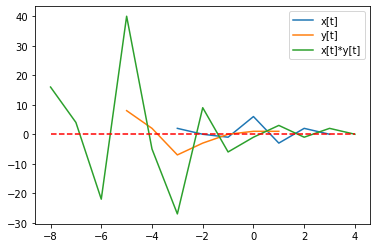

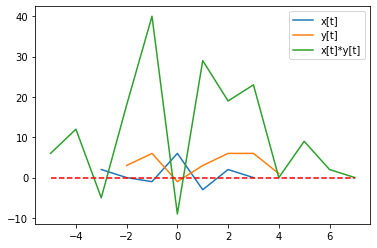

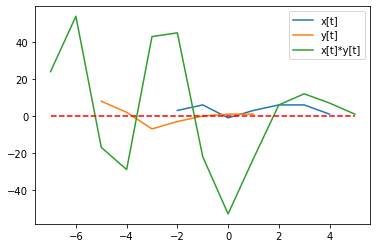

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xt=np.array([2,0,-1,6,-3,2,0])
t1=np.array(list(range(0,7)))-3
yt = np.array([8,2,-7,-3,0,1,1])
t2=np.array(list(range(0,7)))-5
zt = np.array([3,6,-1,3,6,6,1])
t3 = np.array(list(range(0,7)))-2

import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())
ya=np.convolve(xt,yt)
ta=np.array(list(range(len(ya))))+t1[0]+t2[0]
print("u[n]=",ya)
print("t_1 [n]=",ta)
yb=np.convolve(xt,zt)
tb=np.array(list(range(len(yb))))+t1[0]+t3[0]
print("v[n]=",yb)
print("t_2 [n]=",tb)
yc = np.convolve(zt, yt)
tc = np.array(list(range(len(yc)))) + t3[0] + t2[0]
print("g[n]=", yc)
print("t_3 [n]=", tc)
plt.figure(1)
p11,=plt.plot(t1,xt,color=mcolors.TABLEAU_COLORS[colors[0]])
p21,=plt.plot(t2,yt,color=mcolors.TABLEAU_COLORS[colors[1]])
p31,=plt.plot(ta,ya,color=mcolors.TABLEAU_COLORS[colors[2]])
plt.plot(ta,np.zeros([1,len(ta)])[0],"r--")
plt.legend([p11,p21,p31],["x[t]","y[t]","x[t]*y[t]"])
plt.figure(2)
p12, = plt.plot(t1, xt, color=mcolors.TABLEAU_COLORS[colors[0]])
p22, = plt.plot(t3, zt, color=mcolors.TABLEAU_COLORS[colors[1]])
p32, = plt.plot(tb, yb, color=mcolors.TABLEAU_COLORS[colors[2]])
plt.plot(tb, np.zeros([1, len(tb)])[0], "r--")
plt.legend([p12, p22, p32], ["x[t]", "y[t]", "x[t]*y[t]"])
plt.figure(3)
p13, = plt.plot(t3, zt, color=mcolors.TABLEAU_COLORS[colors[0]])
p23, = plt.plot(t2, yt, color=mcolors.TABLEAU_COLORS[colors[1]])
p33, = plt.plot(tc, yc, color=mcolors.TABLEAU_COLORS[colors[2]])
plt.plot(tc, np.zeros([1, len(tc)])[0], "r--")
plt.legend([p13, p23, p33], ["x[t]", "y[t]", "x[t]*y[t]"])
plt.show()


## Q2.

Use the delay properties of delta functions,
$$
x[t]*\delta [t-t_0]=x[t-t_0]
$$
to express the $v[n]$ in terms of $y[n]$:
$$
\begin{aligned}
v[n]&=x_{1}[n]*x_{2}[n]*\delta[n-N_{1}]*\delta[n-N_{2}]\\ 
&=x_{1}[n]*x_{2}*\delta[n-N_{1}-N_{2}]\\ 
&=y[n-N_{1}-N_{2}]
\end{aligned}
$$

## Q3. 

Display the given sequences with example rectangle pulses to get an intuitive view. Take the example parameters below:

$$
M>0,R<M<L\Rightarrow -L=-10,-M=-6,R=-4,K=2,N=4
$$

Then use Python to plot the sequences:

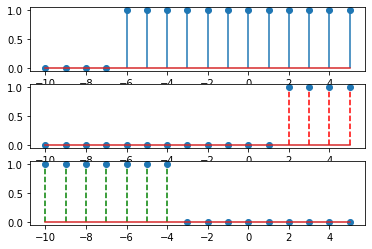

In [2]:
l=10
m=6
r=4
k=2
n=6

t1=np.arange(-1*l,n,step=1)
hn=np.array(t1>=-1*m)*np.array(t1<=n)*1
gn=1*np.array(t1>=k)*np.array(t1<=n)
wn=1*np.array(t1>=-1*l)*np.array(t1<=-1*r)

plt.figure(1)
plt.subplot(311)
plt.stem(t1,hn)
plt.subplot(312)
plt.stem(t1,gn,linefmt='r--')
plt.subplot(313)
plt.stem(t1,wn,linefmt='g--')
plt.show()

### (a) 
For $y_{1}[t]=h[t]*h[t]$, the length of convolved sequence should be
``` python
len(numpy.convolve(h,h))=2*len(h)+1
```
which equals to $2M+2N-1$. And the non-zero region of convolution is $[-2M,2N]$. The python plot below is evident to the deduction above.

Length of h[n]= 12
Length of y1[n]= 23


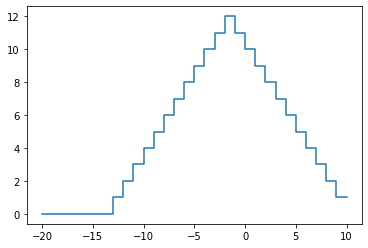

In [3]:
y1=np.convolve(hn,hn)
ty1=np.array(list(range(0,len(y1))))+2*t1[0]
print("Length of h[n]=",np.count_nonzero(hn))
print("Length of y1[n]=",np.count_nonzero(y1))

plt.figure(1)
plt.step(ty1,y1)
plt.show()

### (b)

Similar to (a), the length of $g[n]*g[n]$ is
``` python
2*len(g[n])+1
```
and equals to $2N-2K+1$. The beginning index of the convolution output is 
$$
I_{b}=t(g[t])+t(g[t])=2K,
$$
and the ending index is
$$
I_{f}=2N.
$$

### (c)

Use the conclusion from question (a) and (b), the length and non-zero interval of $y_{3}[n]=h[n]*g[n]$ is

$$
L=len(h[n])+len(g[n])+1=M+2N-K+1,
$$

$$
I_{i}=t_{i}(h[t])+t_{i}(g[t])=-M+K,I_{f}=t_{f}(h[t])+t_{f}(g[t])=2N
$$
Therefore
$$
T=[-M+K,2N]
$$

### (d)

$$
L=len(h[t])+len(w[t])+1=N+M+L-R+1,
$$

$$
T=[-L-M,N-R]
$$

## Q4.
Evaluate the equation use ZT.
$$
\begin{aligned}
\mathcal{Z}(a^{t}u[t]*u[t])&=\frac{z/a}{z/a-1}\cdot\frac{z}{z-1}\\ 
&=\frac{z^2}{(z-a)(z-1)}\\ 
&=\frac{a}{a-1}\frac{z}{z-a}+\frac{-1}{a-1}\frac{z}{z-1}
\end{aligned}
$$

Therefore
$$
\begin{aligned}
a^{t}u[t]*u[t]&=\mathcal{Z}^{-1}(\frac{a}{a-1}\frac{z}{z-a}+\frac{-1}{a-1}\frac{z}{z-1})\\ 
&=\left(\frac{1-a^{n+1}}{1-a}\right)u[t]
\end{aligned}
$$

## Q5.

Validate the conjugate symmetricity by performing the two transforms below:
$$
z[t]=x[t]*y[t]\Rightarrow z_{1}[t]=z^{*}[-t], D=\frac{z[t]}{z_{1}[t]}
$$

$D=1$ indicates the $z[t]$ is conjugate symmetric, $D=-1$ indicates the $z[t]$ is conjugate asymmetric.

### (a)

For arbitrary function, evaluate its conjugate symmetric and conjugate asymmetric parts:

$$
\begin{aligned}
x_{CS}[t]&=\frac{1}{2}(x[t]+x^{*}[-t])\\ 
x_{CA}[t]&=\frac{1}{2}(x[t]-x^{*}[-t])
\end{aligned}
$$

Therefore,

$$
\begin{aligned}
z[t]&=\frac{1}{2}(h[t]+h^{*}[-t])*\frac{1}{2}(g[t]+g^{*}[-t])\\ 
&=\frac{1}{4}(h[t]*g[t]+h^{*}[-t]*g^{*}[-t]+h[t]*g^{*}[-t]+h^{*}[-t]*g[t]),\\ 
z_{1}[t]&=z^{*}[-t]\\ 
&=\frac{1}{4}(h^{*}[-t]*g^{*}[-t]+h[t]*g[t]+h^{*}[-t]*g[t]+h[t]*g^{*}[-t])\\ 
\Rightarrow D&=1
\end{aligned}
$$

The function $h_{CS}[t]*g_{CS[t]}$ is conjugate symmetric.

### (b)

Use the identical method to determine the conjugate symmetricity of $h_{CA}[t]*g_{CS}[t]$.

$$
D=\frac{z[t]}{z_{1}[t]}=-1
$$

This function is conjugate asymmetric.

### (c)

Use the identical method to determine the conjugate symmetricity of $h_{CA}[t]*g_{CA}[t]$.

$$
D=\frac{z[t]}{z_{1}[t]}=1
$$

This function is conjugate symmetric.

## Q6.

### (a)

$$
x_{1}[n]=\alpha^{n}u[n]*\delta[n-1]
$$

Given $\alpha<1$, the convergence of $x_{1}[n]$ is the same as $\alpha^{n}u[n]$, which converges to a constant

$$
\sum_{0}^{\infty}\alpha^{n}u[n]=\frac{1}{1-\alpha}, \alpha<1
$$

### (b) 

The converging radius of the expression

$$
\sum_{0}^{\infty} n\alpha^{n}x^{n}, x=1, \alpha<1
$$

is

$$
\lim_{n\rightarrow\infty}\left\vert \frac{n\alpha^{n}}{(n+1)\alpha^{n+1}} \right\vert=\frac{1}{\alpha}>1.
$$

Therefore the expression converges absolutely on the interval $|\alpha|<1$

### (c)

$$
\sum_{0}^{\infty}\frac{1}{(n+2)(n+3)}<\sum_{0}^{\infty}\frac{1}{n^{2}},
$$

Therefore the expression converges absolutely.

## Q7.

Use the conclusion of Q6.(a), evaluate the convergence range:

$$
|\alpha|>1
$$

## Q8.

Obtain the impulse response of a LTI system from its step response using differentiation.

$$
\begin{aligned}
\mathcal{S}(u[t])&=h[t]*u[t],\\ 
\delta[t]&=u[t]-u[t-1]=u[t]*(\delta[t]-\delta[t-1])\\ 
\Rightarrow h[t]&=\mathcal{S}(u[t])*(\delta[t]-\delta[t-1])\\ 
&=s[n]-s[n-1].
\end{aligned}
$$

Thus the response of arbitary input $x[t]$ is the convolution of input and impulse response:

$$
y[t]=x[t]*h[t]=x[t]*(s[t]-s[t-1])
$$

## Q9.

Use ZT to obtain the step response.

$$
s[t]=u[t]\left(\frac{1-(-a)^{n+1}}{1+a}\right)
$$

## Q10.

Use ZT to obtain the system function in Z-domain:

$$
\begin{aligned}
Y&=H_{4}(H_{1}H_{2}+H_{3})(X+H_{5}Y)\\ 
(1-H_{4}(H_{1}H_{2}+H_{3}))Y&=H_{4}(H_{1}H_{2}+H_{3})X\\ 
Y&=\frac{H_{4}(H_{1}H_{2}+H_{3})}{1-H_{4}(H_{1}H_{2}+H_{3})}X
\end{aligned}
$$